In [51]:
import numpy as np

data = {'x': [], 'y':[], 'class':[], 'color': []}


mean_std_dev = [([2,3], np.diag([0.8, 2.5])) ,
([5,6], np.diag([1.2, 1.9])),
([8,1], np.diag([0.9, 0.9])),
([15,4], np.diag([0.5, 2.0]))]
mean = [2, 3]
cov = np.diag([0.8, 2.5])
for i in range(0, 4):

    mean = mean_std_dev[i][0]
    cov = mean_std_dev[i][1]

    x, y = np.random.multivariate_normal(mean, cov, 100).T
    classe = []
    for c in range(0, len(x)):
        data['x'].append(x[c])
        data['y'].append(y[c])
        data['class'].append(f"class_{i}")
        if i == 0:
            data['color'].append((1.0, 0.0, 0.0))
        if i == 1:
            data['color'].append((1.0,0.0,1.0,))
        if i == 2:
            data['color'].append((1.0, 1.0, 0.0))
        if i == 3:
            data['color'].append((1.0, 0.5, 0.5))


In [52]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,x,y,class,color
0,0.710757,3.666313,class_0,"(1.0, 0.0, 0.0)"
1,2.810294,1.458766,class_0,"(1.0, 0.0, 0.0)"
2,0.854907,4.358507,class_0,"(1.0, 0.0, 0.0)"
3,0.569114,2.943896,class_0,"(1.0, 0.0, 0.0)"
4,1.520029,2.537345,class_0,"(1.0, 0.0, 0.0)"


c:\Users\eduse\anaconda3\conda\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='x', ylabel='y'>

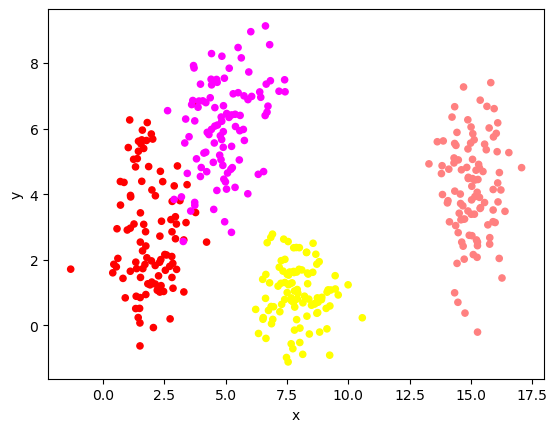

In [53]:
df.plot.scatter(x='x', y='y',c='color', colormap='viridis')

## Exercicio 2

In [66]:
uA = [0,0,0,0,0]
covariance_matrix_a = [
    [1, 0.8, 0.1, 0, 0 ],
    [1, 0.8, 0.1, 0, 0 ],
    [1, 0.8, 0.1, 0, 0 ],
    [1, 0.8, 0.1, 0, 0 ],
    [1, 0.8, 0.1, 0, 0 ]
]
samples = np.random.multivariate_normal(uA, covariance_matrix_a, 500).T



C:\Users\eduse\AppData\Local\Temp\ipykernel_3628\157756149.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(uA, covariance_matrix_a, 500).T
